## New-Product Development
The Moore Pharmaceuticals has a new-product development decision which involves a lot of uncertainty. The company is interested in evaluating the risk associated with the project and need to answer 3 questions as follows:

1. What is the risk that the net present value over the five years will not be positive?
2. What are the chances that the product will show a positive cumulative net profit in the third year?
3. In the fifth year, what minimum amount of cumulative profit are we likely to achieve with a probability of at least 0.90?

Suppose that the project manager of Moore Pharmaceuticals has identified the following uncertain variables in the model and the distributions and parameters that describe them, as follows:

Market size: normal with mean of 2,000,000 units and standard deviation of 400,000 units. 
R&D costs: uniform between $600,000,000 and $800,000,000. 
Clinical trial costs: normal with mean of $150,000,000 and standard deviation $30,000,000. 
Annual market growth factor: triangular with minimum = 2%, maximum 6%, and most likely = 3%. 
Annual market share growth rate: triangular with minimum = 15%, maximum = 25%, and most likely = 20%. 


In [174]:
import numpy as np
import pandas as pd
import statistics
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
discount_rate = 0.09
unit_sales = 130
unit_cost = 40
unit_margin = unit_sales - unit_cost
market_size_mean = 2000000
market_size_sd = 40000
clinical_trial_cost_mean = 150000000
clinical_trial_cost_sd = 30000000
rd_cost_lower = 600000000
rd_cost_upper = 800000000
annual_mk_growth_min = .02
annual_mk_growth_mode = .03
annual_mk_growth_max = .06  
share_growth_min = .15
share_growth_mode = .2
share_growth_max = .25
iteration = 1000
project_year = 5
def project ():
    outputs = []
    for i in range(iteration):
        rd_cost = np.random.uniform(rd_cost_lower,rd_cost_upper)
        clinical_trial_cost = np.random.normal(clinical_trial_cost_mean,clinical_trial_cost_sd)
        project_cost = round((rd_cost + clinical_trial_cost)/1000000)
        share = .08
        mksize = np.random.normal(market_size_mean,market_size_sd)
        share_growth = list(np.random.triangular(share_growth_min,share_growth_mode,share_growth_max,project_year))
        annual_mk_growth = list(np.random.triangular(annual_mk_growth_min,annual_mk_growth_mode,annual_mk_growth_max,project_year))
        yearly_cum_profit = []
        cumulated_profit = 0 - project_cost
        npv_profit = 0
        year = 0
        while year < project_year:
            profit = round((share * mksize *  unit_margin * 12)/1000000)
            cumulated_profit = cumulated_profit + profit
            yearly_cum_profit.append(cumulated_profit)
            npv_profit = npv_profit + round(profit/(1+discount_rate)**(year+1))
            share = share * (1+share_growth[year])
            mksize = mksize * (1+ annual_mk_growth[year])
            year += 1
        npv_project = round((npv_profit - project_cost))
        yearly_cum_profit.append(npv_project)
        outputs.append(yearly_cum_profit)
    return outputs


In [176]:
df = pd.DataFrame(project(), columns = ['year1','year2','year3','year4','year5','Total_NPV'])
df.head()


,year1,year2,year3,year4,year5,Total_NPV
0,-631,-417,-155,170,574,230
1,-762,-545,-282,51,458,111
2,-727,-520,-256,69,470,128
3,-693,-478,-213,123,539,187
4,-613,-401,-143,174,578,238


In [177]:
df.describe(percentiles=[.95, .75, .5, .25, .05])

,year1,year2,year3,year4,year5,Total_NPV
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-678.592000,-463.461000,-195.745000,136.939000,551.353000,199.98200
std,64.784849,65.645227,67.705583,72.131784,80.790752,73.98103
min,-840.000000,-636.000000,-387.000000,-70.000000,316.000000,-12.00000
5%,-783.050000,-570.050000,-302.000000,22.950000,425.000000,84.90000
25%,-726.250000,-513.000000,-244.000000,83.000000,491.000000,144.00000
50%,-680.000000,-464.000000,-197.500000,134.500000,550.000000,198.00000
75%,-631.000000,-414.000000,-146.000000,190.000000,609.000000,253.00000
95%,-574.000000,-356.000000,-84.950000,257.050000,688.000000,325.10000
max,-509.000000,-293.000000,-1.000000,370.000000,838.000000,447.00000


<AxesSubplot:ylabel='Frequency'>

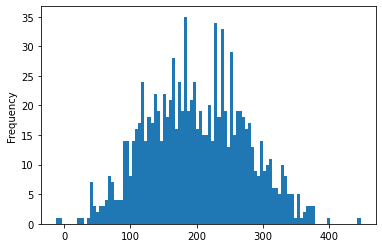

In [178]:
df['Total_NPV'].plot.hist(bins=100)
# df['Total_NPV'].plot.kde()

## Risk analysis

1. What is the probability that the net present value over the 5 years will not be positive? >>> Done. P(x < 0) of Total NPV

2. What are the chances that the product will show a cumulative net profit in the third year? >>> Pending. P(x > 0) in Year 3

3. What cumulative profit in the fifth year are we likely to realize with a probability of at least 0.90? Or in the fifth year, what minimum amount of cumulative profit are we likely to achieve with a probability of at
least 0.90? ~ we are looking for the 10th percentile

In [179]:
threshold_x1 = 0
p_x1 = sum(map(lambda x: x < threshold_x1, df['Total_NPV']))/len(df)
p_x1_display = "{:.0%}".format(p_x1)
print('Chance of npv < threshold ' + str(threshold_x1) + 'M is: ' + str(p_x1_display))

Chance of npv < threshold 0M is: 0%


In [180]:
threshold_x2 = 0
p_x2 = sum(map(lambda x: x > threshold_x2, df['year3']))/len(df)
p_x2_display = "{:.0%}".format(p_x2)
print('Chance of year 3 cumulated net profit > threshold ' + str(threshold_x2) + 'M is: ' + str(p_x2_display))

Chance of year 3 cumulated net profit > threshold 0M is: 0%


In [181]:
print('Minimum amount of cumulative profit are we likely to achieve in year 5 is: ' + str(np.percentile(df['year5'],10)))

Minimum amount of cumulative profit are we likely to achieve in year 5 is: 449.0
